In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [2]:
## Code to test out and play against a bot who makes random moves

## Change n here to play on different sized matrix
n = 3
end = n*n

# initialising nxn matrix as an array to make it easier to convert between options and matrix locations with all values set to nxn to distinguish from 0 and 1 
# the array will be printed as a matrix using the reshape function
mat = np.full(end,end,dtype=int)
options_player = np.arange(1, end+1)
options_bot = my_list = list(range(0, end))


# initialising turn as 1 since there will be exactly n*n turns
turn = 0

# explanation of the game:
print('for the matrix:')
print(mat.reshape(-1,n))
print(f'your objective is to add 0s whilst your opponent adds 1s in place of {n*n} so that you end up with a matrix with a determinant of zero')


# function to check who wins
def win_check(mat,n):
    det = np.linalg.det(mat.reshape(-1,n))
    if det == 0:
        print('You win!')
    else:
        print('You lose!')
        
# function to check the players choice is possible
def check_player(x,options,n):
    while True:
        if not (0<=x<=n*n):
            print('Uh oh! That value is not within the specified range! Try again! You can add a 0 in any of the following locations not marked 0:')
            print(options.reshape(-1,n))
            x = int(input(f'add a 0 to which part of the matrix (up to {n*n})?')) - 1
            
        if options[x] == 0:
            print('Uh oh! That value is already taken! Try again! You can add a 0 in any of the following locations not marked 0:')
            print(options.reshape(-1,n))
            x = int(input(f'add a 0 to which part of the matrix (up to {n*n})?')) - 1
        else:
            return x

def game(myturn,n):
    global mat
    global options_player
    global options_bot
    global turn
    global end
    
    if myturn == 1:
        
        print('you can add a 0 in any of the following locations not marked 0:')
        print(options_player.reshape(-1,n))
        x = int(input(f'add a 0 to which part of the matrix (up to {end})?')) - 1
        x = check_player(x,options_player,n)
        
        mat[x] = 0
        options_player[x] = 0
        options_bot.remove(x)
        
        print(mat.reshape(-1,n))
        
        if turn+1==end:
            win_check(mat,n)
            return 0
        
        turn = turn + 1
        
        game(0,n)

    else:
        x = rng.choice(options_bot,1)[0]
        print(f"Bot's turn: 1 added in {x+1} position")
        mat[x] = 1
        options_player[x] = 0
        options_bot.remove(x)
        
        print(mat.reshape(-1,n))
        
        if turn+1==end:
            win_check(mat,n)
            return 0
        
        turn = turn + 1
        
        game(1,n)

myturn = 0 ###### 1 = player starts first, 0 = bot starts first

game(myturn,n)

for the matrix:
[[9 9 9]
 [9 9 9]
 [9 9 9]]
your objective is to add 0s whilst your opponent adds 1s in place of 9 so that you end up with a matrix with a determinant of zero
Bot's turn: 1 added in 7 position
[[9 9 9]
 [9 9 9]
 [1 9 9]]
you can add a 0 in any of the following locations not marked 0:
[[1 2 3]
 [4 5 6]
 [0 8 9]]


add a 0 to which part of the matrix (up to 9)? 3


[[9 9 0]
 [9 9 9]
 [1 9 9]]
Bot's turn: 1 added in 9 position
[[9 9 0]
 [9 9 9]
 [1 9 1]]
you can add a 0 in any of the following locations not marked 0:
[[1 2 0]
 [4 5 6]
 [0 8 0]]


add a 0 to which part of the matrix (up to 9)? 2


[[9 0 0]
 [9 9 9]
 [1 9 1]]
Bot's turn: 1 added in 8 position
[[9 0 0]
 [9 9 9]
 [1 1 1]]
you can add a 0 in any of the following locations not marked 0:
[[1 0 0]
 [4 5 6]
 [0 0 0]]


add a 0 to which part of the matrix (up to 9)? 1


[[0 0 0]
 [9 9 9]
 [1 1 1]]
Bot's turn: 1 added in 5 position
[[0 0 0]
 [9 1 9]
 [1 1 1]]
you can add a 0 in any of the following locations not marked 0:
[[0 0 0]
 [4 0 6]
 [0 0 0]]


add a 0 to which part of the matrix (up to 9)? 4


[[0 0 0]
 [0 1 9]
 [1 1 1]]
Bot's turn: 1 added in 6 position
[[0 0 0]
 [0 1 1]
 [1 1 1]]
You win!


In [3]:
## Simulation of the game where random matrices of ones and zeroes is created

## input is turn (who starts) and n (how many rows and how many columns the matrix has)
## output is 1 if determinant is 0 and output is 0 otherwise
## turn = 0 means p0 starts (the one who adds zeroes)
## turn = 1 means p1 starts (the one who adds ones)

## For even n, the number of zeroes and ones is the same
## For odd n, the number of zeroes and ones depends on who starts



def rand_game_simulation(turn, n):
    n_sq = n * n
    ## matrix is initialised as zero
    mat = np.zeros( n_sq , dtype = int )
    options = np.arange( n_sq , dtype=int)
    
    if n % 2 == 0:
        k = int( n_sq / 2 )
    else:
        if turn == 0:           #p0 starts so less 1s added
            k = ( n_sq - 1 ) / 2
            k = int(k)
        else:                   #p1 starts so more 1s added
            k = ( n_sq + 1 ) / 2
            k = int(k)
            
    rng.shuffle(options)
    
    for i in range(k):
        j = options[i]
        mat[j] = 1
    
    det = np.linalg.det(mat.reshape(-1,n))
    if det == 0:
        return 1
    else:
        return 0    

In [4]:
## function that returns win percentage for p0
## for a given strategy based on who starts, the size of matrix, and the number of trials

def simulation(game_simulation,turn,n,sample):
    wins = 0
    for i in range(sample):
        wins = wins + game_simulation(turn,n)
    return wins/sample

In [5]:
## running simulations for the first 20 nxn matrices (up to 20x20)
## running 10000 simulations each
## even and odd simulations done seperately since even n isnt affected by who starts
## graphed probabilities when p0 starts vs when p1 starts as n increases

turn = 0
sample = 10000
n_even = np.arange(10)
even_prob = np.zeros(10)
even = 0

for j in range(10):
    even = ( j + 1 ) * 2
    even_prob[j] = simulation(rand_game_simulation,turn,even,sample)
    
turn_0 = 0
turn_1 = 1
sample = 10000
n_odd = np.arange(10)
odd_prob_0 = np.zeros(10)
odd_prob_1 = np.zeros(10)
odd = 0

for j in range(10):
    odd = ( 2 * j ) + 1
    odd_prob_0[j] = simulation(rand_game_simulation,turn_0,odd,sample)
    odd_prob_1[j] = simulation(rand_game_simulation,turn_1,odd,sample)
    
n = np.arange(20) + 1
total_0 = np.zeros(20)
total_1 = np.zeros(20)

for j in range(10):
    even = 2*j
    odd = even + 1
    total_0[even] = even_prob[j]
    total_0[odd] = odd_prob_0[j]
    total_1[even] = even_prob[j]
    total_1[odd] = odd_prob_1[j]
    


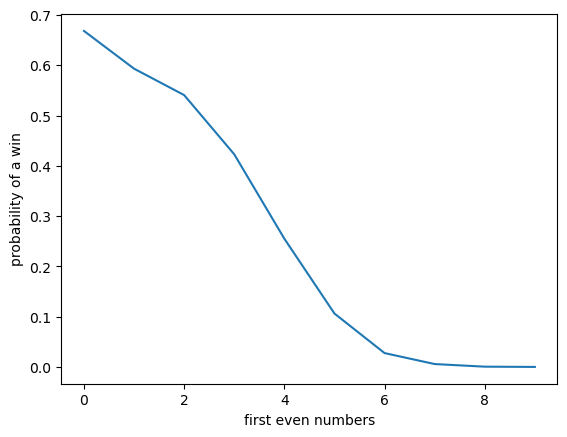

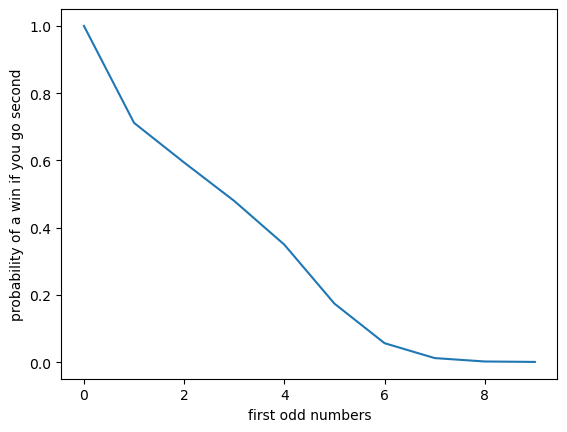

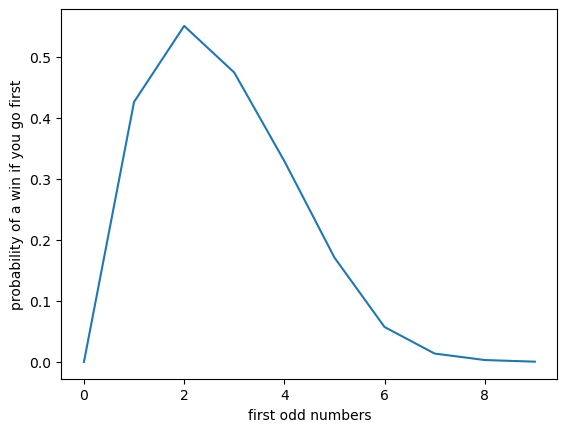

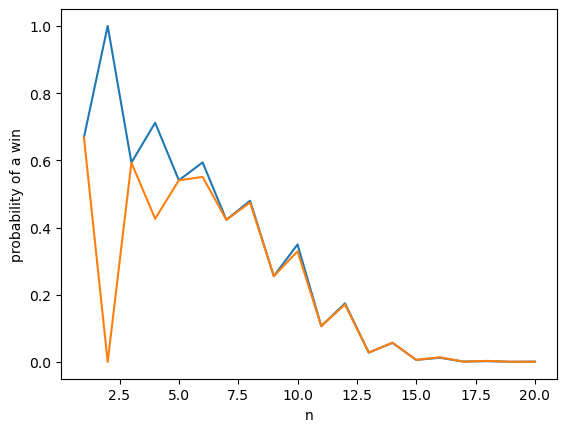

In [6]:
plt.plot(n_even,even_prob)
plt.xlabel('first even numbers')
plt.ylabel('probability of a win')
plt.show()

plt.plot(n_odd,odd_prob_0)
plt.xlabel('first odd numbers')
plt.ylabel('probability of a win if you go second')
plt.show()


plt.plot(n_odd,odd_prob_1)
plt.xlabel('first odd numbers')
plt.ylabel('probability of a win if you go first')
plt.show()

plt.plot(n,total_0)
plt.plot(n,total_1)
plt.xlabel('n')
plt.ylabel('probability of a win')
plt.show()